In [1]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# We are taking Acter dataset with the corruption and heart failure domains

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Domain
corp_en_01     983
corp_en_02     403
corp_en_04     261
corp_en_05     247
corp_en_06    1751
corp_en_07    1434
corp_en_08     678
corp_en_09     442
corp_en_10      86
corp_en_11    1039
corp_en_12    1069
corp_en_19     414
Name: Token, dtype: int64


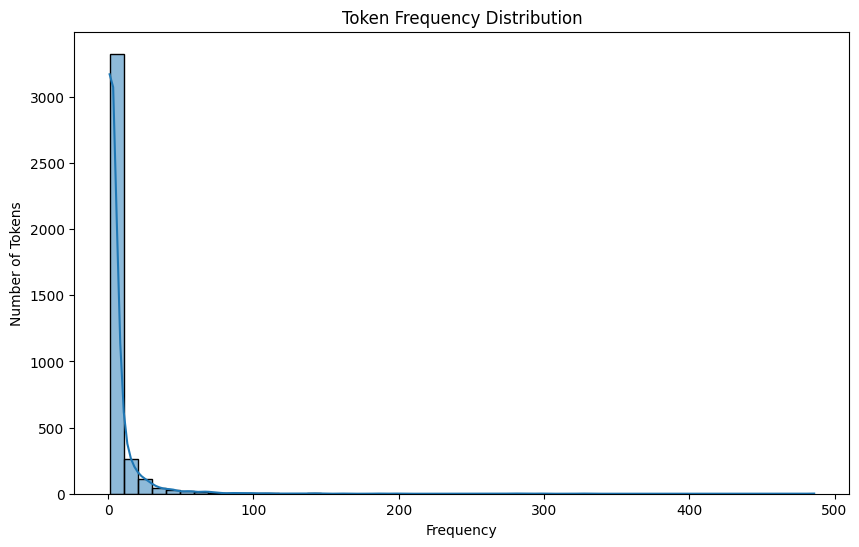

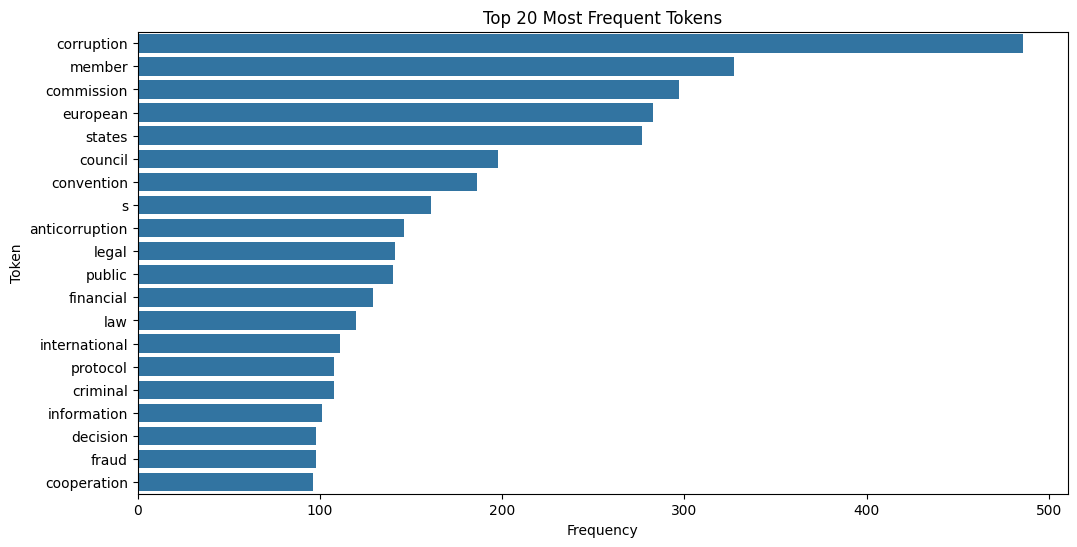

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import nltk

# Download stopwords if not available
nltk.download('stopwords')
nltk.download('punkt')

# Load default NLTK stopwords
nltk_stopwords = set(stopwords.words('english'))

# Manually provided stopwords
custom_stopwords = {"the", "of", "and", "a", "with", "to", "in", "on", "be", "for",
                    "as", "eu", "or", "by", "is", "that", "are", "an", "will", "it",
                    "which", "should", "has", "not", "at", "its", "article", "against", "this", "s"
                   ,"may","also","shall","within","greco","1","2"}

# Merge both sets
stopwords_set = nltk_stopwords.union(custom_stopwords)

data_dir = ""
files = ["corp_en_02.txt", "corp_en_04.txt", "corp_en_01.txt",
         "corp_en_05.txt", "corp_en_06.txt", "corp_en_07.txt", "corp_en_08.txt",
         "corp_en_09.txt", "corp_en_10.txt", "corp_en_11.txt", "corp_en_12.txt", "corp_en_19.txt"]

data_list = []
for file_name in files:
    file_path = os.path.join(data_dir, file_name)

    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()

    # Tokenization
    tokens = word_tokenize(text)

    # Remove punctuation and stopwords
    filtered_tokens = [re.sub(r'[^\w\s]', '', token).lower()
                       for token in tokens
                       if token.lower() not in stopwords_set and re.sub(r'[^\w\s]', '', token).strip() != '']

    df = pd.DataFrame(filtered_tokens, columns=['Token'])
    df["Domain"] = file_name.split(".")[0]
    data_list.append(df)

full_df = pd.concat(data_list, ignore_index=True)

print(full_df.groupby("Domain")["Token"].nunique())

# Token frequency
token_counts = full_df["Token"].value_counts().reset_index()
token_counts.columns = ["Token", "Frequency"]

# Histogram of token frequency
plt.figure(figsize=(10, 6))
sns.histplot(token_counts['Frequency'], bins=50, kde=True)
plt.title('Token Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Number of Tokens')
plt.show()

# Top 20 frequent tokens
plt.figure(figsize=(12, 6))
sns.barplot(x="Frequency", y="Token", data=token_counts.head(20))
plt.title("Top 20 Most Frequent Tokens")
plt.show()


In [4]:
print(token_counts.describe())

         Frequency
count  3846.000000
mean      6.470879
std      17.571864
min       1.000000
25%       1.000000
50%       2.000000
75%       5.000000
max     486.000000


Here are we definen a set of stopwords to be excluded from tokenization.Loop through each file, read its content, tokenize words, remove stopwords, convert tokens into a DataFrame, and append the processed data to a list.Count the frequency of each token and create a DataFrame.Visualize the distribution of token frequencies using a histogram and displaied the top 20 most frequent tokens in the dataset and printed summary statistics.


In [5]:
outliers = token_counts[token_counts['Frequency'] > token_counts['Frequency'].mean() + 3 * token_counts['Frequency'].std()]
print(f'Number of Outlier Tokens: {len(outliers)}')
print('Outlier Tokens:', outliers['Token'].tolist())


Number of Outlier Tokens: 49
Outlier Tokens: ['corruption', 'member', 'commission', 'european', 'states', 'council', 'convention', 's', 'anticorruption', 'legal', 'public', 'financial', 'law', 'international', 'protocol', 'criminal', 'information', 'decision', 'fraud', 'cooperation', 'members', 'report', 'union', 'national', 'person', 'measures', 'rules', 'second', 'would', 'cases', 'participation', 'relevant', 'interests', 'framework', 'protection', 'policy', 'fight', 'state', 'persons', 'countries', 'ecb', '3', 'europe', 'paragraph', 'office', 'political', 'action', 'specific', 'evaluation']


Identified and printed outlier tokens using the 3-sigma rule.

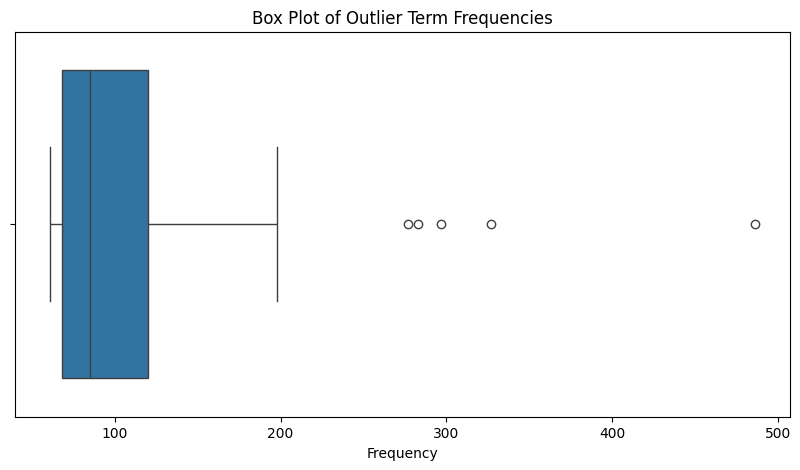

In [6]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=outliers['Frequency'])
plt.title("Box Plot of Outlier Term Frequencies")
plt.xlabel("Frequency")
plt.show()

Visualized outliers in box plot

In [7]:
full_df.drop_duplicates(inplace=True)
full_df.dropna(inplace=True)

In [8]:
token_counts['Normalized_Frequency'] = token_counts['Frequency'] / token_counts['Frequency'].max()

In [9]:
token_counts['Normalized_Frequency']

,Normalized_Frequency
0,1.000000
1,0.672840
2,0.611111
3,0.582305
4,0.569959
...,...
3841,0.002058
3842,0.002058
3843,0.002058
3844,0.002058


In [10]:
print(full_df.isnull().sum())  # Check if any missing values exist


Token     0
Domain    0
dtype: int64


Removed duplicates and missing values and normilized token frequencies

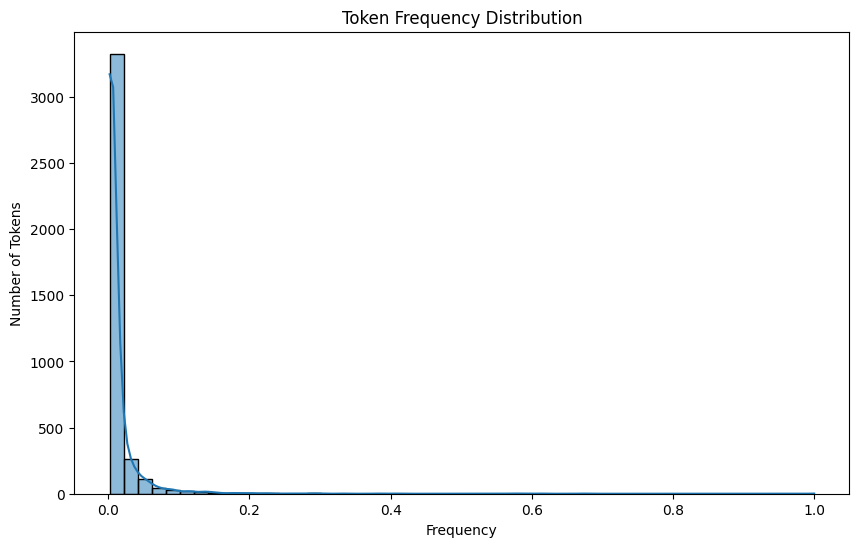

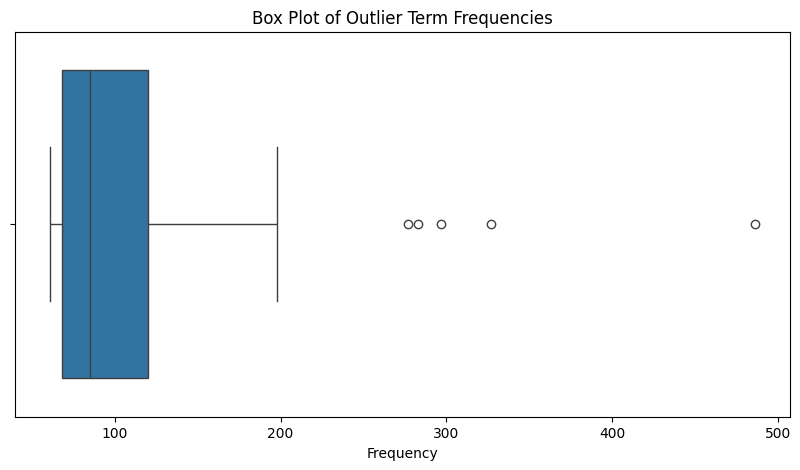

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(token_counts['Normalized_Frequency'], bins=50, kde=True)
plt.title('Token Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Number of Tokens')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=outliers['Frequency'])
plt.title("Box Plot of Outlier Term Frequencies")
plt.xlabel("Frequency")
plt.show()

In [34]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 10.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system 

In [42]:
import os
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizerFast, BertForTokenClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split


# Load BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")


# Define dataset class
class TermExtractionDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoding = self.tokenizer(
            self.texts[idx],
            truncation=True,
            padding="max_length",
            max_length=self.max_len,
            is_split_into_words=True,
            return_tensors="pt"
        )

        word_ids = encoding.word_ids()
        aligned_labels = []
        last_word = None

        for word in word_ids:
            if word is None:
                aligned_labels.append(-100)  # Ignore loss calculation for padding
            elif word != last_word:
                aligned_labels.append(self.labels[idx][word])
            else:
                aligned_labels.append(self.labels[idx][word])  # Extend labels for subwords
            last_word = word

        aligned_labels = aligned_labels[:self.max_len] + [-100] * (self.max_len - len(aligned_labels))
        encoding["labels"] = torch.tensor(aligned_labels, dtype=torch.long)

        return {key: val.squeeze(0) for key, val in encoding.items()}

# Load and preprocess data
def load_data(tsv_files):
    texts, labels = [], []
    label_map = {"O": 0, "B": 1, "I": 2}  # Label encoding

    for file in tsv_files:
        df = pd.read_csv(file, sep="\t", header=None, names=["Token", "Label"], quoting=3)
        text = df["Token"].tolist()
        label = [label_map[l] for l in df["Label"].tolist()]
        texts.append(text)
        labels.append(label)

    return texts, labels

# Specify individual TSV files
tsv_files = ["corp_en_01_seq_terms.tsv",
            "corp_en_02_seq_terms.tsv",
            "corp_en_04_seq_terms.tsv",
            "corp_en_05_seq_terms.tsv",
            "corp_en_06_seq_terms.tsv",
            "corp_en_07_seq_terms.tsv",
            "corp_en_08_seq_terms.tsv",
            "corp_en_09_seq_terms.tsv",
            "corp_en_10_seq_terms.tsv",
            "corp_en_11_seq_terms.tsv",
            "corp_en_12_seq_terms.tsv",
            "corp_en_19_seq_terms.tsv"
]  # Replace with actual file paths
texts, labels = load_data(tsv_files)
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.2, random_state=42)


In [43]:
import os
os.environ["WANDB_DISABLED"] = "true"
train_dataset = TermExtractionDataset(train_texts, train_labels, tokenizer)
val_dataset = TermExtractionDataset(val_texts, val_labels, tokenizer)

# Load model
model = BertForTokenClassification.from_pretrained("bert-base-uncased", num_labels=3)

# Training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
)

# Trainer object
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)

# Train model
trainer.train()

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Epoch,Training Loss,Validation Loss
1,No log,0.394340
2,No log,0.290883
3,No log,0.262589


TrainOutput(global_step=6, training_loss=0.4791894753774007, metrics={'train_runtime': 106.6049, 'train_samples_per_second': 0.253, 'train_steps_per_second': 0.056, 'total_flos': 1763769053952.0, 'train_loss': 0.4791894753774007, 'epoch': 3.0})

In [45]:
from sklearn.metrics import precision_recall_fscore_support, classification_report
import numpy as np

# Move model to the same device as data (CUDA if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Prepare DataLoader for validation set
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)

# Get Predictions
all_preds, all_labels = [], []

model.eval()
with torch.no_grad():
    for batch in val_loader:
        # Move batch to device
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        # Forward pass
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits  # Shape: (batch_size, seq_length, num_labels)
        predictions = torch.argmax(logits, dim=-1)  # Get label with highest score

        # Convert tensors to lists
        all_preds.extend(predictions.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Flatten lists and remove ignored tokens (-100)
pred_labels = []
true_labels = []

for pred_seq, true_seq in zip(all_preds, all_labels):
    for pred, true in zip(pred_seq, true_seq):
        if true != -100:  # Ignore padding tokens
            pred_labels.append(pred)
            true_labels.append(true)

# Compute evaluation metrics
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, pred_labels, average="weighted")

print("\nEvaluation Results:")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}\n")





Evaluation Results:
Precision: 0.8379
Recall:    0.9153
F1-score:  0.8749



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


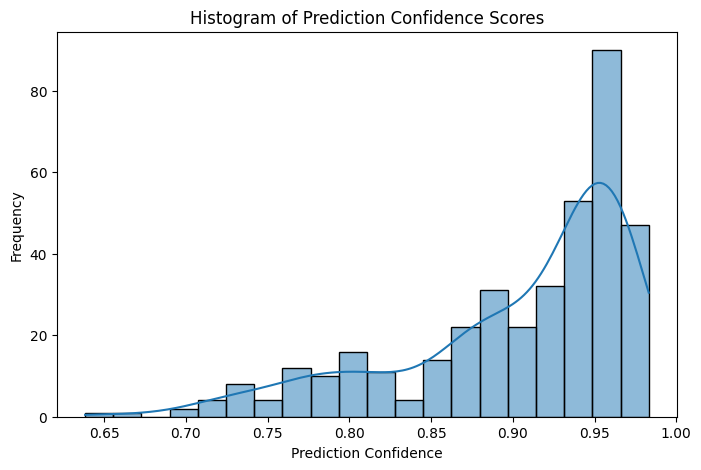

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import torch.nn.functional as F


probs = F.softmax(torch.tensor(trainer.predict(val_dataset).predictions), dim=-1)


confidences = probs.max(axis=-1).values.flatten().numpy()


plt.figure(figsize=(8, 5))
sns.histplot(confidences, bins=20, kde=True)
plt.xlabel("Prediction Confidence")
plt.ylabel("Frequency")
plt.title("Histogram of Prediction Confidence Scores")
plt.show()

